# TP2 - IBD

In [1]:
from IPython.display import Image
from IPython.display import display, HTML
%matplotlib inline

import timeit
from time import time


In [2]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 14
plt.rcParams["figure.figsize"] = fig_size

conn = sqlite3.connect('tp_marvel.db')


In [6]:
def compare(x, y):
    x = np.mean(x)
    y = np.mean(y)
    if (x > y):
        print("A segunda consulta foi, em média, {}% mais rápida que a primeira".format(round((1 - y/x)*100, 2)))        
    else:
        print("A primeira consulta foi, em média, {}% mais rápida que a segunda".format(round((1 - x/y)*100, 2)))

In [7]:
def calc(querry, conn, niter=1000):
    time_elapsed = []
    
    for _ in range(niter):    
        init = time()
        df = pd.read_sql_query(querry, conn)
        time_elapsed.append(time() - init)
    return time_elapsed

In [8]:
def hist(time1, time2):
    plt.hist(x, bins=50, alpha=0.4, label='Primeira consulta', color ='green')
    plt.hist(y, bins=50, alpha=0.4, label='Segunda consulta', color = 'yellow')
    plt.legend(loc='upper right')
    plt.title("Comparação dos tempos das duas consultas")
    plt.show()

**Introdução**
<p>Nossa ideia inicial era trabalhar com um grande dataset contendo informações sobre heróis de diferentes editoras e universos (Marvel, DC, etc). Todavia, isso seria um tanto quanto trabalhoso uma vez que boa parte dos datasets encontrados por nós, possui uma enorme quantidade de dados e, em alguns casos, dados incompletos ou inutilizáveis. Optamos então por restringir nossa análise ao universo Marvel e nos limitarmos a uma certa quantidade de heróis pertencentes a tal. Veremos que, mesmo com tais restrições, conseguimos traçar algumas análises bem interessantes.</p>

**Dataset 1 (Poderes)**:
<p>O primeiro dataset a set inserido no nosso banco contém informações sobre os superpoderes de vários super heróis de diferentes universos. A partir dele, extraímos um sub-datase mostrado a seguir, que utilizaremos para nossas consultas ao longo do presente trabalho. </p>
<p>
Dataset original disponível em:
</p>
<p>
dataframe que o armazena: dfpower
</p>

In [3]:
dfpower = pd.read_csv('powers.csv')
dfpower.to_sql('Poderes', conn) 

Com a simples finalidade de ilustrar o dataset original, fazemos uma consulta que retorna todo o conteúdo do mesmo. A partir dela percebemos que cada coluna faz referência a um super-poder e cada linha representa um determinado herói.

In [4]:
dfpower = pd.read_sql("SELECT * FROM Poderes", conn)
dfpower = dfpower.drop(['index'], axis=1)
dfpower

,id,Name,Agility,Accelerated_Healing,Durability,Stealth,Flight,Marksmanship,Weapons_Master,Longevity,Intelligence,Super_Strength,Energy_Blasts,Stamina,Super_Speed,Reflexes,Invulnerability
0,1,A-Bomb,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0
1,4,Abomination,0,1,0,0,0,0,0,0,1,1,0,1,1,0,1
2,5,Abraxas,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1
3,6,Absorbing Man,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,9,Agent Bob,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,10,Agent Zero,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
6,11,Air-Walker,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
7,12,Ajax,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8,19,Ammo,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,21,Angel,1,1,1,1,1,0,0,1,0,1,0,1,1,0,0


O segundo dataset escolhido é responsável pelas características físicas dos heróis de diferentes editoras. Ele contém, além do nome de cada um, o sexo, cor dos olhos, raça, cor dos cabelos, altura, editora, cor de pele, moral e peso. 

Abaixo inserimos o mesmo em nosso banco de dados e realizamos uma consulta simples a fim de visualizar o conteúdo da tabela. 

In [5]:
dfpower = pd.read_csv('character.csv')
dfpower.to_sql('Personagens', conn) 

In [6]:
dfchars = pd.read_sql("SELECT * FROM Personagens", conn)
dfchars = dfchars.drop(['index'], axis=1)
dfchars

,id,Name,gender,eye_color,race,hair_color,height,skin_color,alignment,weight
0,1,A-Bomb,Male,yellow,Human,No Hair,203.0,-,good,441
1,4,Abomination,Male,green,Human / Radiation,No Hair,203.0,-,bad,441
2,5,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,-,bad,-99
3,6,Absorbing Man,Male,blue,Human,No Hair,193.0,-,bad,122
4,9,Agent Bob,Male,brown,Human,Brown,178.0,-,good,81
5,10,Agent Zero,Male,-,-,-,191.0,-,good,104
6,11,Air-Walker,Male,blue,-,White,188.0,-,bad,108
7,12,Ajax,Male,brown,Cyborg,Black,193.0,-,bad,90
8,19,Ammo,Male,brown,Human,Black,188.0,-,bad,101
9,21,Angel,Male,blue,-,Blond,183.0,-,good,68


In [10]:
dfmovies = pd.read_csv('movie.csv')
dfmovies.to_sql('Movies', conn)

In [11]:
dfmovies = pd.read_sql("SELECT * FROM Movies", conn)
dfmovies = dfmovies.drop(['index'], axis=1)
dfmovies

,name,year,gross_Worldwide,phase,id
0,Iron Man,02/05/2008,585.2,1,1
1,The Incredible Hulk,13/06/2008,263.4,1,2
2,Iron Man 2,07/05/2010,623.9,1,3
3,Thor,06/05/2011,449.3,1,4
4,Captain America: The First Avenger,22/07/2011,370.6,1,5
5,The Avengers,04/05/2012,1518.8,1,6
6,Iron Man 3,03/05/2013,1214.8,2,7
7,Thor: The Dark World,08/11/2013,644.6,2,8
8,Captain America: The Winter Soldier,04/04/2014,714.3,2,9
9,Guardians of the Galaxy,01/08/2014,773.3,2,10


In [12]:
dfrating = pd.read_csv('rating.csv')
dfrating.to_sql('Rating', conn)

In [13]:
dfrating = pd.read_sql("SELECT * FROM Rating", conn)
dfrating = dfrating.drop(['index'], axis=1)

dfrating

,Rotten_Tomatoes,IMDb,id
0,93,7.9,1
1,67,6.7,2
2,73,7.0,3
3,77,7.0,4
4,80,6.9,5
5,92,8.1,6
6,79,7.2,7
7,66,6.9,8
8,90,7.8,9
9,91,8.1,10


In [14]:
dfrel = pd.read_csv('relat.csv')
dfrel.to_sql('Relat', conn)

In [15]:
dfrel = pd.read_sql("SELECT * FROM Relat", conn)
dfrel = dfrel.drop(['index'], axis=1)

dfrel

,character,movie,screenTime
0,310,1,4635.0
1,296,1,0.0
2,644,1,495.0
3,97,1,0.0
4,605,1,0.0
5,280,1,0.0
6,133,1,0.0
7,226,1,0.0
8,653,1,0.0
9,574,1,0.0


## 2 Operações de Seleção e Projeção

### Nome dos filmes cuja bilheteria é maior que a média de todos os filmes lançados

In [57]:
c1 = "SELECT name FROM Movies WHERE gross_Worldwide > (SELECT AVG(gross_Worldwide) FROM Movies)"
sql = pd.read_sql(c1, conn)
sql

,name
0,The Avengers
1,Iron Man 3
2,Avengers: Age of Ultron
3,Captain America: Civil War
4,Black Panther
5,Avengers: Infinity War
6,Captain Marvel
7,Avengers: Endgame


In [111]:
c2 = "SELECT AVG(gross_Worldwide) FROM Movies"
sql = pd.read_sql(c2, conn)
sql

,AVG(gross_Worldwide)
0,961.718182


In [112]:
c3 = "SELECT name FROM Movies WHERE gross_Worldwide > 961.718182"
sql = pd.read_sql(c3, conn)
sql

,name
0,The Avengers
1,Iron Man 3
2,Avengers: Age of Ultron
3,Captain America: Civil War
4,Black Panther
5,Avengers: Infinity War
6,Captain Marvel
7,Avengers: Endgame


**Comparação**

In [113]:
x = calc(c1, conn)
y = calc(c2, conn)
compare(x,y)

A segunda consulta foi, em média, 77.31% mais rápida que a primeira


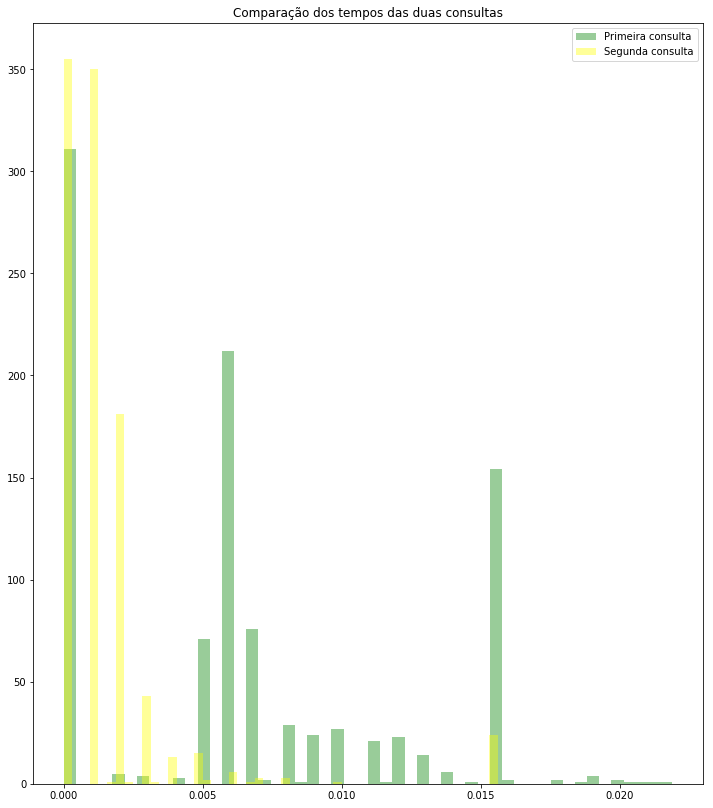

In [114]:
hist(x,y)

### Número de personagens por sexo

In [86]:
c1 = "SELECT gender, COUNT(*) FROM Personagens GROUP BY gender"
sql = pd.read_sql(c1, conn)
sql

,gender,COUNT(*)
0,-,15
1,Female,99
2,Male,227


In [87]:
c2 = "SELECT count(*) FROM Personagens WHERE gender = 'Female'"
sql = pd.read_sql(c2, conn)
sql

,count(*)
0,99


In [88]:
c3 = "SELECT count(*) FROM Personagens WHERE gender = 'Male'"
sql = pd.read_sql(c3, conn)
sql

,count(*)
0,227


In [89]:
c4 = "SELECT count(*) FROM Personagens WHERE gender = '-'"
sql = pd.read_sql(c4, conn)
sql

,count(*)
0,15


**Comparação**

In [90]:
x = calc(c1, conn)
y = calc(c2, conn)
a = calc(c3, conn)
b = calc(c4, conn)
compare(x,y+a+b)

A segunda consulta foi, em média, 27.68% mais rápida que a primeira


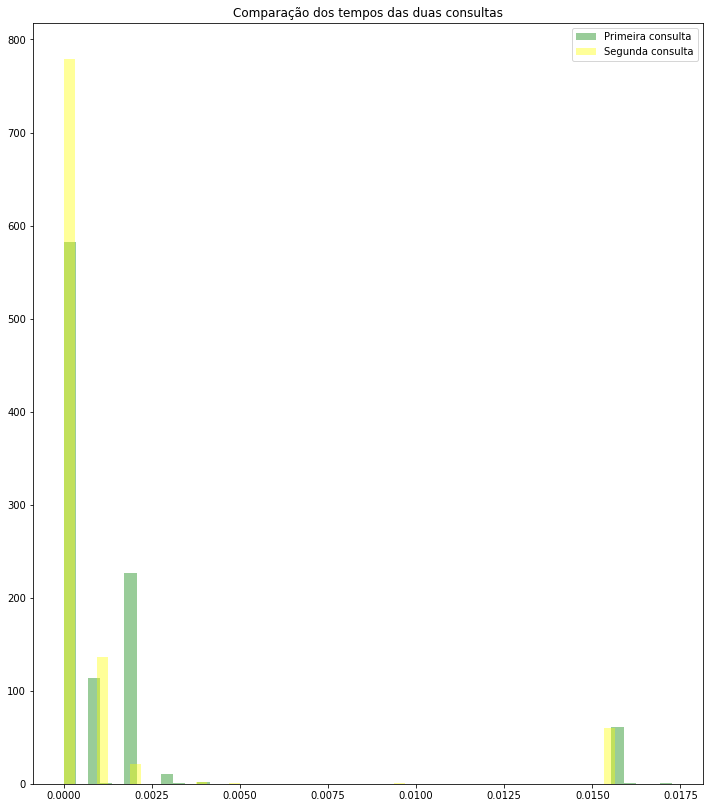

In [91]:
hist(x,a+b+y)

## 3 Junção de Duas Relações

### Os 3 personagens que mais aparecem no filme mais bem avaliado pelo IMDb

In [18]:
c1 = "SELECT P.name, RE.screenTime FROM Personagens as P, Relat as RE WHERE (P.id = RE.character) AND RE.movie IN (SELECT M.id FROM Movies as M INNER JOIN Rating as R ON M.id = R.id ORDER BY R.IMDb DESC LIMIT 1) ORDER BY RE.screenTime DESC LIMIT 3"
sql = pd.read_sql(c1, conn)
sql

,Name,screenTime
0,Iron Man,2130.0
1,Captain America,2130.0
2,Hulk,1245.0


In [19]:
c2 = "SELECT P.Name, RE.screenTime FROM Personagens as P, Relat as RE WHERE (P.id = RE.character) AND RE.movie IN (SELECT M.id FROM Movies as M, Rating as R WHERE (R.IMDb = (SELECT MAX(IMDb) FROM Rating) AND R.id = M.id)) ORDER BY RE.screenTime DESC LIMIT 3"
sql = pd.read_sql(c2, conn)
sql

,Name,screenTime
0,Iron Man,2130.0
1,Captain America,2130.0
2,Hulk,1245.0


**Comparação entre as duas**

In [20]:
x = calc(c1, conn)
y = calc(c2, conn)
compare(x,y)

A primeira consulta foi, em média, 3.6% mais rápida que a segunda


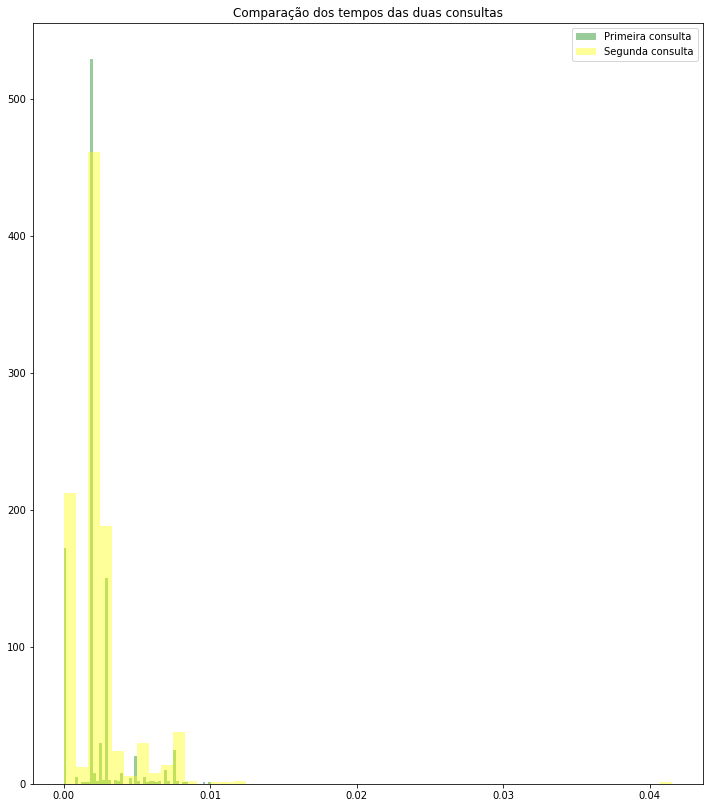

In [21]:
hist(x, y)

### Os poderes mais comuns dos vilões dos filmes

In [22]:
c1 = "SELECT SUM(Agility), SUM(Accelerated_Healing), SUM(Durability), SUM(Stealth), SUM(Flight), SUM(Marksmanship), SUM(Weapons_Master), SUM(Longevity), SUM(Intelligence), SUM(Super_Strength), SUM(Energy_Blasts), SUM(Stamina), SUM(Super_Speed), SUM(Reflexes), SUM(Invulnerability) FROM Poderes as Po WHERE Po.id IN (SELECT P.id FROM Personagens as P WHERE P.alignment = 'bad' AND P.id IN (SELECT character FROM Relat))"
sql = pd.read_sql(c1, conn)
sql

,SUM(Agility),SUM(Accelerated_Healing),SUM(Durability),SUM(Stealth),SUM(Flight),SUM(Marksmanship),SUM(Weapons_Master),SUM(Longevity),SUM(Intelligence),SUM(Super_Strength),SUM(Energy_Blasts),SUM(Stamina),SUM(Super_Speed),SUM(Reflexes),SUM(Invulnerability)
0,5,3,6,1,6,2,1,4,4,9,4,5,6,1,2


In [23]:
c2 = "SELECT SUM(Agility), SUM(Accelerated_Healing), SUM(Durability), SUM(Stealth), SUM(Flight), SUM(Marksmanship), SUM(Weapons_Master), SUM(Longevity), SUM(Intelligence), SUM(Super_Strength), SUM(Energy_Blasts), SUM(Stamina), SUM(Super_Speed), SUM(Reflexes), SUM(Invulnerability) FROM Poderes as Po WHERE Po.id IN (SELECT P.id FROM Personagens as P INNER JOIN Relat as RE ON P.id = RE.character AND P.alignment = 'bad')"
sql = pd.read_sql(c2, conn)
sql

,SUM(Agility),SUM(Accelerated_Healing),SUM(Durability),SUM(Stealth),SUM(Flight),SUM(Marksmanship),SUM(Weapons_Master),SUM(Longevity),SUM(Intelligence),SUM(Super_Strength),SUM(Energy_Blasts),SUM(Stamina),SUM(Super_Speed),SUM(Reflexes),SUM(Invulnerability)
0,5,3,6,1,6,2,1,4,4,9,4,5,6,1,2


**Comparação**

In [24]:
x = calc(c1, conn)
y = calc(c2, conn)
compare(x,y)

A primeira consulta foi, em média, 10.64% mais rápida que a segunda


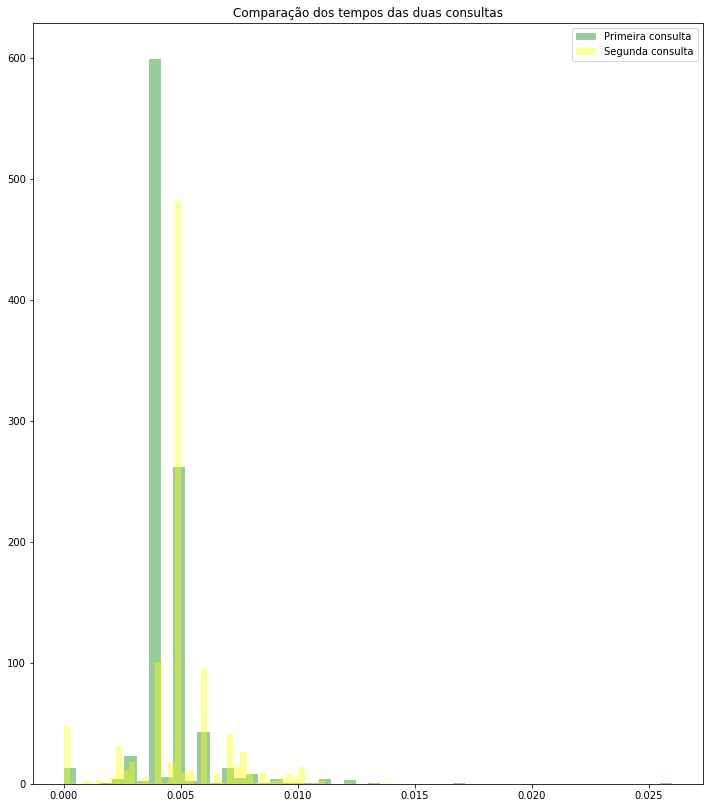

In [25]:
hist(x,y)

### Os 3 personagens com menos tempo de tela no filme mais mal avaliado pelo Rotten da fase 2 do Universo Cinematográfico

In [26]:
c1 = "SELECT P.Name, RE.screenTime FROM Personagens as P, Relat as RE WHERE (RE.screenTime > 0 AND P.id = RE.character) AND RE.movie IN (SELECT M.id FROM Movies as M, Rating as R WHERE (R.Rotten_Tomatoes = (SELECT MIN(Rotten_Tomatoes) FROM Rating WHERE id IN (SELECT id FROM Movies WHERE phase = 2)) AND R.id = M.id)) ORDER BY RE.screenTime ASC LIMIT 3"
sql = pd.read_sql(c1, conn)
sql

,Name,screenTime
0,Sif,195.0
1,Frigga,240.0
2,Odin,540.0


In [27]:
c2 = "SELECT P.name, RE.screenTime FROM Personagens as P, Relat as RE WHERE (RE.screenTime > 0 AND P.id = RE.character) AND RE.movie IN (SELECT M.id FROM Movies as M INNER JOIN Rating as R ON M.id = R.id WHERE M.phase = 2 ORDER BY R.Rotten_Tomatoes ASC LIMIT 1) ORDER BY RE.screenTime ASC LIMIT 3"
sql = pd.read_sql(c2, conn)
sql

,Name,screenTime
0,Sif,195.0
1,Frigga,240.0
2,Odin,540.0


**Comparação**

In [28]:
x = calc(c1, conn)
y = calc(c2, conn)
compare(x,y)

A segunda consulta foi, em média, 3.11% mais rápida que a primeira


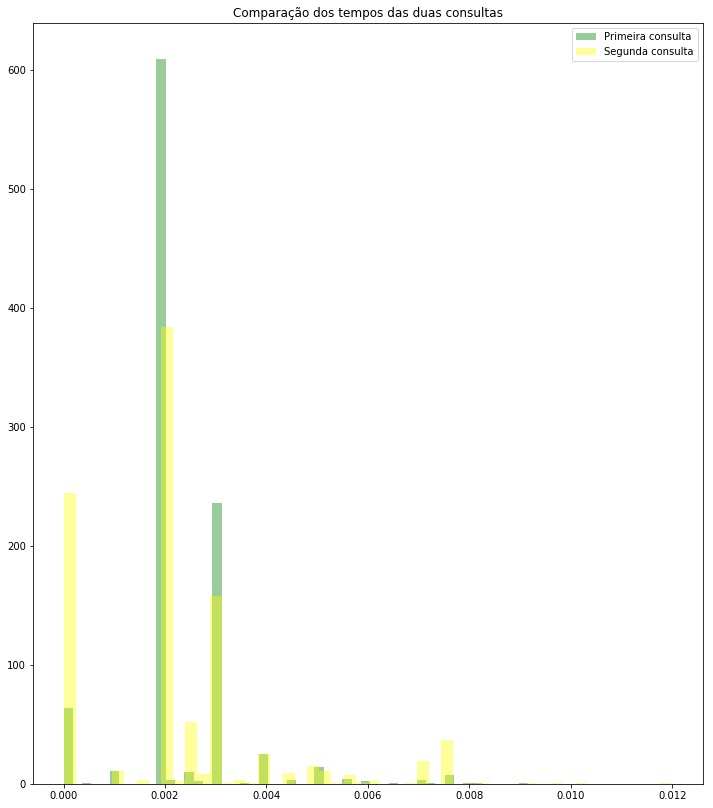

In [29]:
hist(x,y)

## 3 Junção de Três Relações

### Poderes do personagem que mais apareceu no filme mais mal avaliado pelo Rotten Tomatoes

In [118]:
c1 = "SELECT * FROM Poderes WHERE id IN (SELECT P.id FROM Personagens as P INNER JOIN Relat as RE ON P.id = RE.character INNER JOIN Movies as M ON RE.movie = M.id WHERE M.id IN (SELECT id FROM Rating ORDER BY IMDb ASC LIMIT 1) ORDER BY RE.screenTime DESC LIMIT 1)"
sql = pd.read_sql(c1, conn)
sql

,index,id,Name,Agility,Accelerated_Healing,Durability,Stealth,Flight,Marksmanship,Weapons_Master,Longevity,Intelligence,Super_Strength,Energy_Blasts,Stamina,Super_Speed,Reflexes,Invulnerability
0,150,296,Hulk,1,1,1,0,0,0,0,1,0,1,0,1,1,1,1


In [128]:
c2 = "SELECT * FROM Poderes WHERE id IN (SELECT Personagens.id FROM Personagens LEFT JOIN Relat ON Personagens.id = Relat.character INNER JOIN Movies ON Relat.movie = Movies.id WHERE Movies.id IN (SELECT id FROM Rating ORDER BY IMDb ASC LIMIT 1) ORDER BY Relat.screenTime DESC LIMIT 1)"
sql = pd.read_sql(c2, conn)
sql

,index,id,Name,Agility,Accelerated_Healing,Durability,Stealth,Flight,Marksmanship,Weapons_Master,Longevity,Intelligence,Super_Strength,Energy_Blasts,Stamina,Super_Speed,Reflexes,Invulnerability
0,150,296,Hulk,1,1,1,0,0,0,0,1,0,1,0,1,1,1,1


**Comparação**

In [129]:
x = calc(c1, conn)
y = calc(c2, conn)
compare(x,y)

A primeira consulta foi, em média, 8.78% mais rápida que a segunda


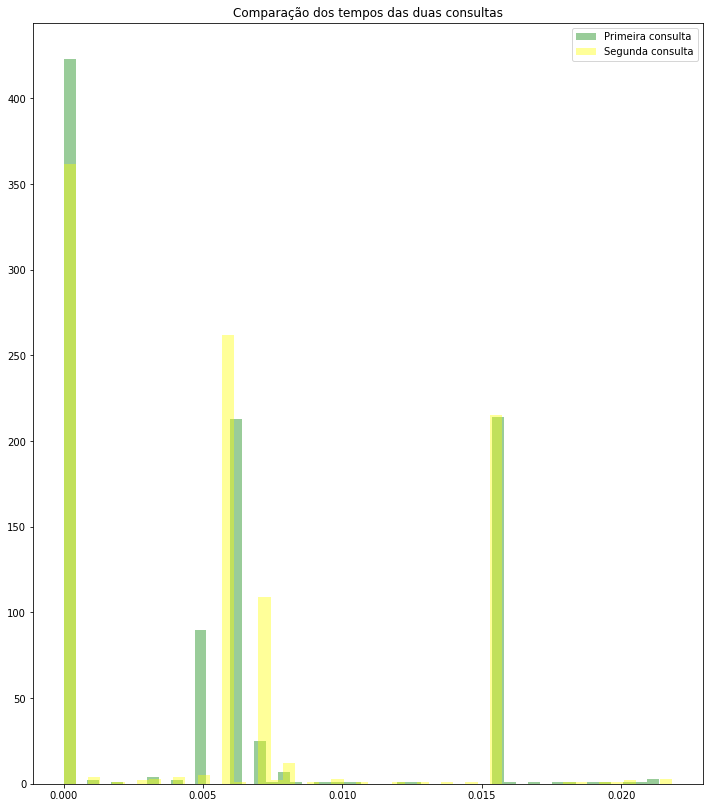

In [130]:
hist(x,y)

### Poderes dos 2 personagens que mais apareceram no filme de maior sucesso nas bilheterias

In [107]:
c1 = "SELECT * FROM Poderes WHERE id IN (SELECT P.id FROM Personagens as P INNER JOIN Relat as RE ON P.id = RE.character INNER JOIN Movies as M ON RE.movie = M.id WHERE M.id IN (SELECT id FROM Movies ORDER BY gross_Worldwide DESC LIMIT 1) ORDER BY RE.ScreenTime DESC LIMIT 2)"
sql = pd.read_sql(c1, conn)
sql

,index,id,Name,Agility,Accelerated_Healing,Durability,Stealth,Flight,Marksmanship,Weapons_Master,Longevity,Intelligence,Super_Strength,Energy_Blasts,Stamina,Super_Speed,Reflexes,Invulnerability
0,68,133,Captain America,1,0,1,1,0,1,1,1,0,0,0,1,0,1,0
1,160,310,Iron Man,0,1,1,0,1,1,0,0,0,1,1,1,1,1,0


In [108]:
c2 = "SELECT * FROM Poderes WHERE id IN (SELECT P.id FROM Personagens as P LEFT JOIN Relat as RE ON P.id = RE.character LEFT JOIN Movies as M ON RE.movie = M.id WHERE M.id IN (SELECT id FROM Movies ORDER BY gross_Worldwide DESC LIMIT 1) ORDER BY RE.ScreenTime DESC LIMIT 2)"
sql = pd.read_sql(c2, conn)
sql

,index,id,Name,Agility,Accelerated_Healing,Durability,Stealth,Flight,Marksmanship,Weapons_Master,Longevity,Intelligence,Super_Strength,Energy_Blasts,Stamina,Super_Speed,Reflexes,Invulnerability
0,68,133,Captain America,1,0,1,1,0,1,1,1,0,0,0,1,0,1,0
1,160,310,Iron Man,0,1,1,0,1,1,0,0,0,1,1,1,1,1,0


**Comparação**

In [109]:
x = calc(c1, conn)
y = calc(c2, conn)
compare(x,y)

A primeira consulta foi, em média, 3.83% mais rápida que a segunda


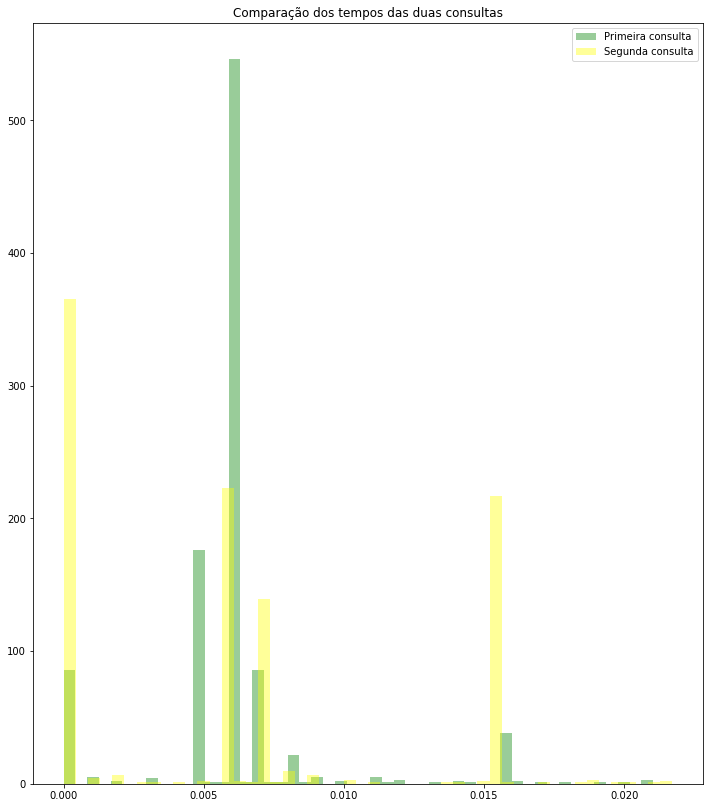

In [110]:
hist(x,y)

### Perfil (características físicas e poderes) do personagem com o menor tempo de tela no filme mais mal avaliado do Universo Cinematográfico segundo o Rotten Tomatoes

In [35]:
c1 = "SELECT * FROM Personagens as P INNER JOIN Poderes as PO ON P.id = PO.id WHERE P.id IN (SELECT RE.character FROM Relat as RE INNER JOIN Movies as M ON RE.movie = M.id INNER JOIN Rating RA ON M.id = RA.id WHERE M.id IN (SELECT id FROM Rating ORDER BY Rotten_Tomatoes ASC LIMIT 1) AND RE.screenTime > 0 ORDER BY RE.ScreenTime ASC LIMIT 1)"
sql = pd.read_sql(c1, conn)
# sql = pd.read_sql("SELECT RE.character FROM Relat as RE INNER JOIN Movies as M ON RE.movie = M.id INNER JOIN Rating RA ON M.id = RA.id WHERE M.id IN (SELECT id FROM Rating ORDER BY Rotten_Tomatoes ASC LIMIT 1) ORDER BY RE.screenTime ASC LIMIT 1", conn)
sql

,index,id,Name,gender,eye_color,race,hair_color,height,skin_color,alignment,...,Marksmanship,Weapons_Master,Longevity,Intelligence,Super_Strength,Energy_Blasts,Stamina,Super_Speed,Reflexes,Invulnerability
0,270,545,Sif,Female,blue,Asgardian,Black,188.0,-,good,...,0,1,1,0,1,0,1,1,1,0


In [36]:
c2 = "SELECT * FROM Personagens NATURAL JOIN Poderes WHERE Personagens.id IN (SELECT character FROM Relat INNER JOIN Movies ON movie = Movies.id INNER JOIN Rating ON Movies.id = Rating.id WHERE Movies.id IN (SELECT id FROM Rating ORDER BY Rotten_Tomatoes ASC LIMIT 1) AND Relat.screenTime > 0 ORDER BY Relat.ScreenTime ASC LIMIT 1)" 
sql = pd.read_sql(c2, conn)
sql

,index,id,Name,gender,eye_color,race,hair_color,height,skin_color,alignment,...,Marksmanship,Weapons_Master,Longevity,Intelligence,Super_Strength,Energy_Blasts,Stamina,Super_Speed,Reflexes,Invulnerability
0,270,545,Sif,Female,blue,Asgardian,Black,188.0,-,good,...,0,1,1,0,1,0,1,1,1,0


**Comparação**

In [37]:
x = calc(c1, conn)
y = calc(c2, conn)
compare(x,y)

A segunda consulta foi, em média, 16.03% mais rápida que a primeira


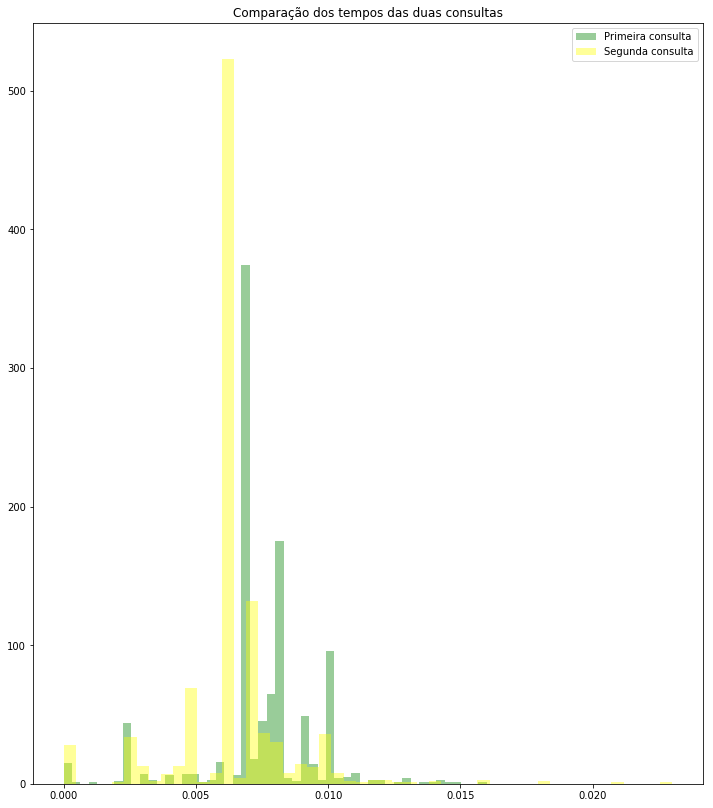

In [38]:
hist(x,y)

## 2 Funções de Agregação Sobre o Resultado da Junção

### Tempo de tela total de cada personagem do Universo Cinematográfico Marvel

In [132]:
c1 = "SELECT P.Name, SUM(screenTime) FROM Movies as M INNER JOIN Relat as RE ON M.id = RE.movie INNER JOIN Personagens as P ON RE.character = P.id GROUP BY RE.character"
sql = pd.read_sql(c1, conn)
sql

,Name,SUM(screenTime)
0,Ant-Man,7095.0
1,Black Panther,3885.0
2,Black Widow,6765.0
3,Captain America,14865.0
4,Captain Marvel,4335.0
5,Doctor Strange,5325.0
6,Dormammu,120.0
7,Drax the Destroyer,2465.0
8,Ego,1020.0
9,Falcon,2115.0


In [133]:
c2 = "SELECT P.Name, SUM(screenTime) FROM Movies as M LEFT JOIN Relat as RE ON M.id = RE.movie LEFT JOIN Personagens as P ON RE.character = P.id GROUP BY P.Name"
sql = pd.read_sql(c2, conn)
sql

,Name,SUM(screenTime)
0,Ant-Man,7095.0
1,Black Panther,3885.0
2,Black Widow,6765.0
3,Captain America,14865.0
4,Captain Marvel,4335.0
5,Doctor Strange,5325.0
6,Dormammu,120.0
7,Drax the Destroyer,2465.0
8,Ego,1020.0
9,Falcon,2115.0


**Comparação**

In [136]:
x = calc(c1, conn)
y = calc(c2, conn)
compare(x,y)

A segunda consulta foi, em média, 4.15% mais rápida que a primeira


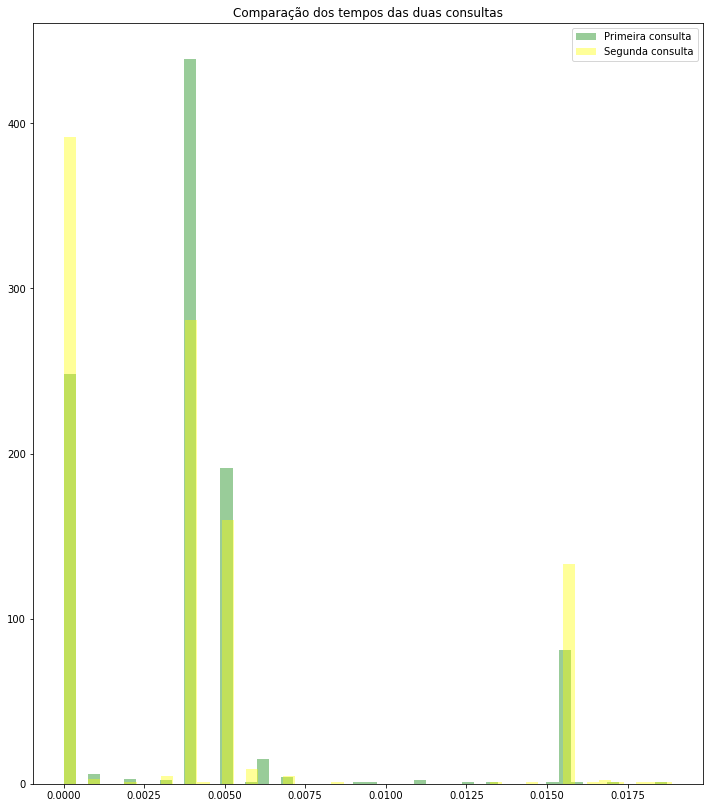

In [135]:
hist(x,y)

### Número de participações em filmes de cada personagem

In [144]:
c1 = "SELECT P.Name, COUNT(*) FROM Movies as M INNER JOIN Relat as RE ON M.id = RE.movie INNER JOIN Personagens as P ON RE.character = P.id WHERE RE.screenTime > 0 GROUP BY RE.character ORDER BY COUNT(*) DESC"
sql = pd.read_sql(c1, conn)
sql

,Name,COUNT(*)
0,Iron Man,10
1,Nick Fury,10
2,Black Widow,9
3,Captain America,9
4,Hulk,8
5,Thor,8
6,War Machine,8
7,Winter Soldier,7
8,Falcon,6
9,Hawkeye,5


In [145]:
c2 = "SELECT P.Name, COUNT(*) FROM Movies as M LEFT JOIN Relat as RE ON M.id = RE.movie LEFT JOIN Personagens as P ON RE.character = P.id WHERE RE.screenTime > 0 GROUP BY P.Name ORDER BY COUNT(*) DESC"
sql = pd.read_sql(c2, conn)
sql

,Name,COUNT(*)
0,Iron Man,10
1,Nick Fury,10
2,Black Widow,9
3,Captain America,9
4,Hulk,8
5,Thor,8
6,War Machine,8
7,Winter Soldier,7
8,Falcon,6
9,Hawkeye,5


**Comparação**

In [146]:
x = calc(c1, conn)
y = calc(c2, conn)
compare(x,y)

A primeira consulta foi, em média, 25.09% mais rápida que a segunda


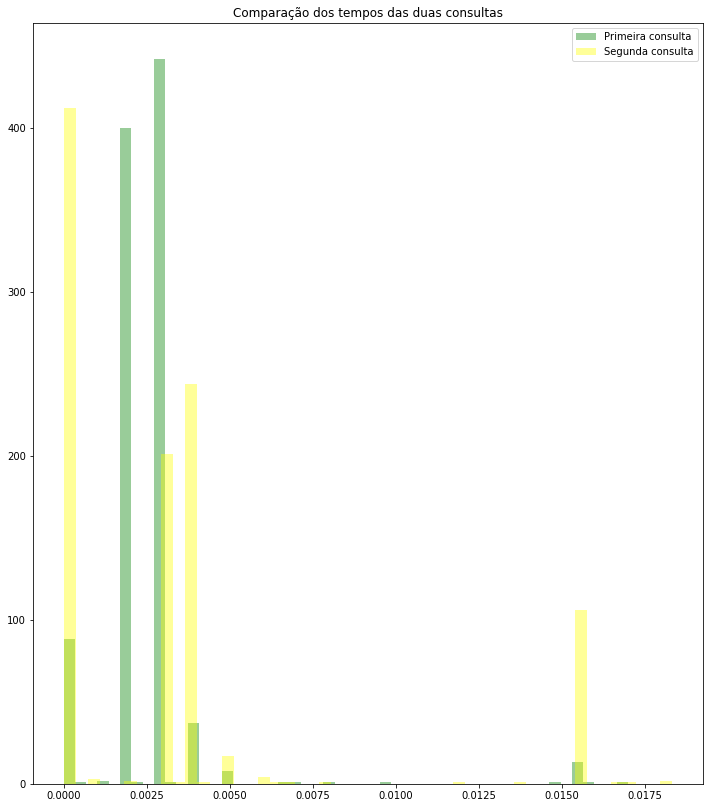

In [147]:
hist(x,y)

## Consultas do Tipo Relatório

### Número de vilões com super força que possuem olhos verdes e que não participaram de nenhum filme

In [23]:
sql = pd.read_sql("SELECT COUNT(*) FROM Personagens as P WHERE eye_color = 'green' AND alignment = 'bad' AND P.id NOT IN (SELECT RE.character FROM Relat as RE) AND P.id IN (SELECT PO.id FROM Poderes as PO WHERE Super_Strength = 1)", conn)
sql

,COUNT(*)
0,6


### Personagem(ns) Asgardiano(s) que possui(em) Inteligência e Super Força como poderes

In [24]:
sql = pd.read_sql("SELECT P.Name FROM Personagens as P NATURAL JOIN Poderes as PO WHERE P.race = 'Asgardian' AND PO.Intelligence = 1 AND PO.Super_Strength = 1", conn)
sql

,Name
0,Loki


### Nome das vilãs com altura maior que 170cm e que participaram em pelo menos 1 filme na fase 3 do Universo Cinematográfico

In [25]:
sql = pd.read_sql("SELECT P.Name FROM Personagens as P WHERE P.alignment='bad' AND P.gender='Female' AND P.height > 170 AND P.id IN (SELECT RE.character FROM Relat as RE INNER JOIN Movies as M ON RE.movie = M.id WHERE M.phase = 3 AND RE.screenTime > 0)", conn)
sql

,Name
0,Hela
1,Nebula


# Universo Cinematográfico Marvel

Uma franquia americana de sucesso e um universo compartilhado centrado em uma série de filmes de super-heróis, produzidos independentemente pela Marvel Studios e baseados em personagens que aparecem nas histórias em quadrinhos publicadas pela Marvel Comics. A franquia se expandiu para incluir histórias em quadrinhos, curtas-metragens, séries de televisão e séries digitais. O universo compartilhado, muito parecido com o Universo Marvel dos quadrinhos, foi estabelecido através do cruzamento de elementos de enredo, elenco e personagens. A franquia geralmente consiste em filmes de heróis com histórias fechadas que se entrelaçam, separados em fases que culminam em "Vingadores". Todos os filmes vão construindo uma trama envolvendo o vilão Thanos e as 5 jóias do Infinito.

In [149]:
df = pd.read_csv("MCU.csv", index_col = False)

## 22 Filmes ao longo de 11 Anos distribuídos em 3 Fases

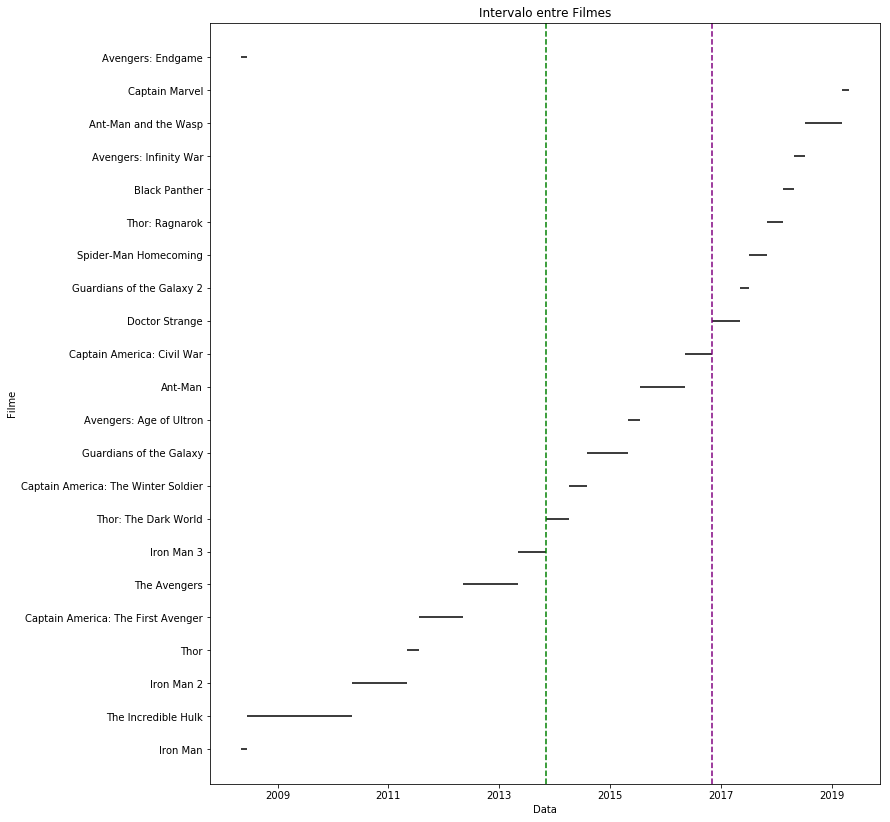

In [150]:
def diff_dates(date1, date2):
    return abs(date2-date1).days

release = df['Year']
release

x = [dt.datetime.strptime(d, '%d/%m/%Y').date() for d in release]
y = df['Movies']

inicio = x[1:]
fim = x[:-1]

# intervalo em dias entre os filmes
intervalos = [diff_dates(x, y) for x, y in zip(inicio, fim)]

plt.axvline(x[7], linestyle='--', color='green')
plt.axvline(x[13], linestyle='--', color='purple')
plt.hlines(y, inicio, fim, linestyle='solid')
plt.title('Intervalo entre Filmes')
plt.xlabel("Data")
plt.ylabel("Filme")
plt.show()

A maior lacuna entre os lançamentos (693 dias) ocorreu entre "O Incrível Hulk" e o "Homem de Ferro 2".

## Fase 1

O primeiro conjunto de filmes apresenta o universo principal no qual os filmes são ambientados, bem como os personagens principais como Homem de Ferro, Thor, Capitão América, Hulk, Viúva Negra, Gavião Arqueiro e Nick Fury, e organizações como a S.H.I.E.L.D. e HYDRA.
Muitos dos filmes da Fase 1 se concentram no Tesseract, um artefato alienígena que mais tarde é estabelecido como uma das 6 jóias do Infinito. O filme final, "Os Vingadores", envolve o vilão Loki e Thanos aliando-se para roubar o Tesseract e conquistar a Terra, levando à formação do grupo.

### Bilheteria

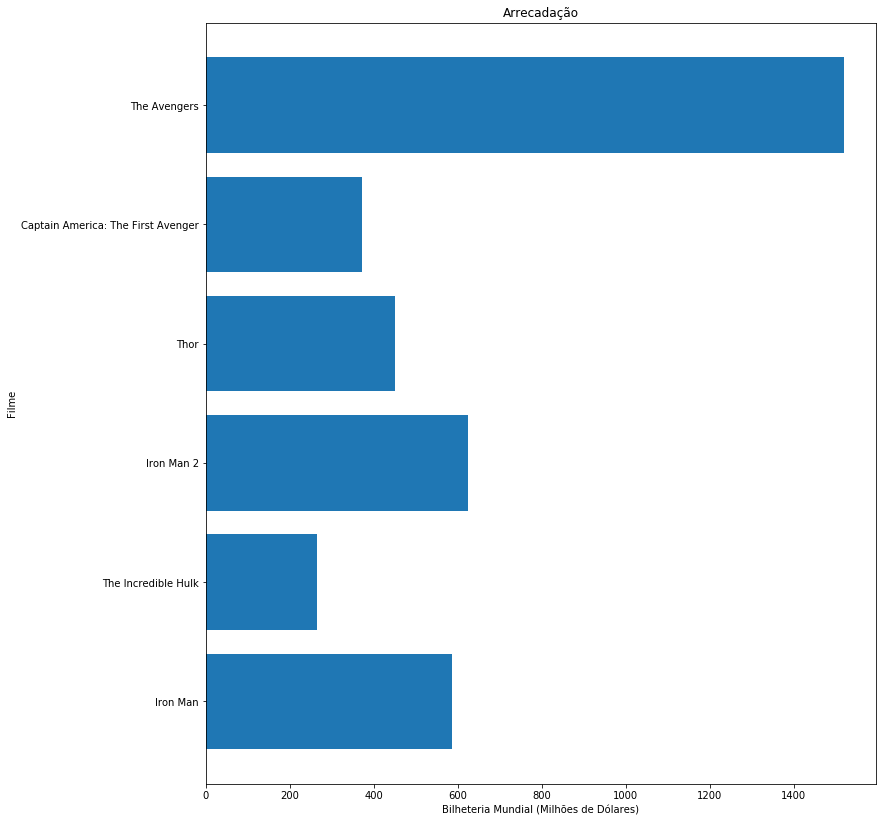

In [151]:
filmes1 = df[df['Phase']==1]['Movies']
bilheteria1 = df[df['Phase']==1]['Gross Worldwide']

plt.title('Arrecadação')
plt.xlabel("Bilheteria Mundial (Milhões de Dólares)")
plt.ylabel("Filme")
plt.barh(filmes1, bilheteria1)
plt.show()

### Crítica

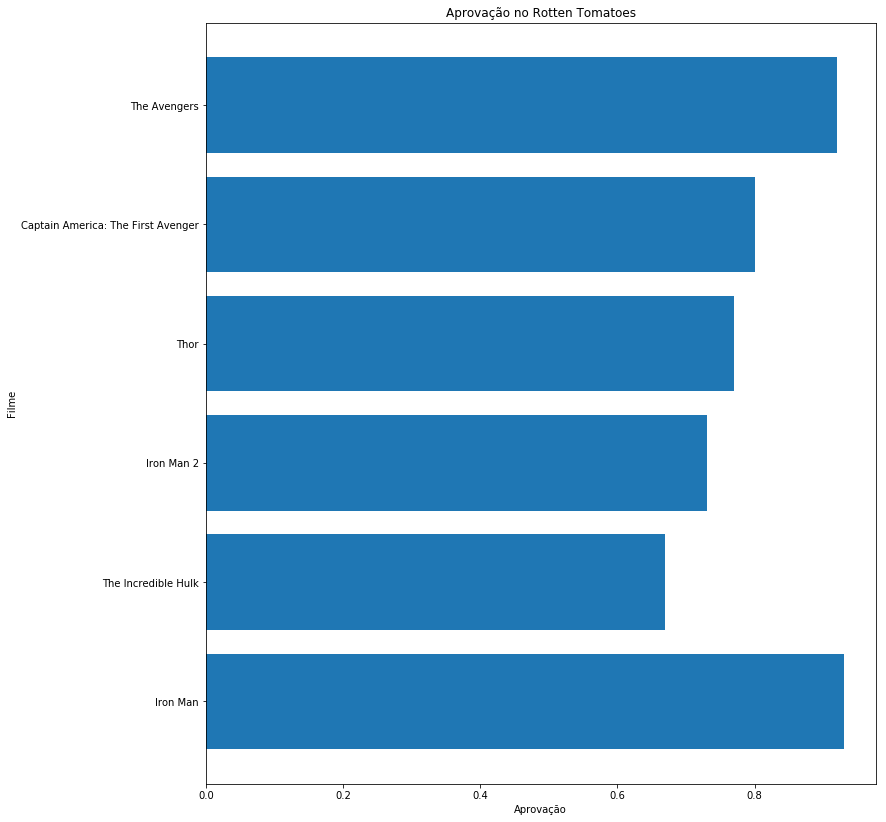

In [29]:
imdb1 = df[df['Phase']==1]['IMDb']
rotten1 = df[df['Phase']==1]['Rotten Tomatoes']

plt.barh(filmes1, rotten1)
plt.title('Aprovação no Rotten Tomatoes')
plt.xlabel("Aprovação")
plt.ylabel("Filme")
plt.show()

### Tempo de Tela dos Personagens

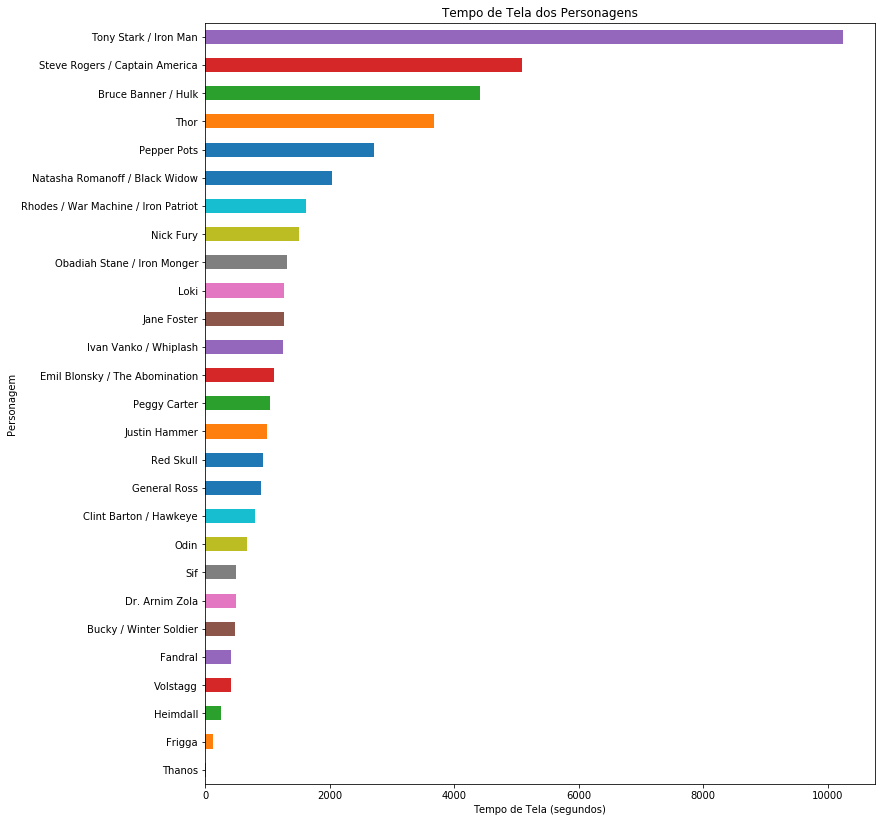

In [30]:
personagens1 = df[df['Phase']==1]
personagens1 = personagens1.loc[:, 'Tony Stark / Iron Man':'Hank Pym']

personagens1 = personagens1.loc[:, ~(personagens1 == 0).all()]

tempo = personagens1.sum().sort_values()

plt.title('Tempo de Tela dos Personagens')
plt.ylabel('Personagem')
plt.xlabel('Tempo de Tela (segundos)')
tempo.plot(kind='barh')


## Fase 2

A segunda fase concentra-se nas aventuras dos Vingadores e da S.H.I.E.L.D. após a batalha de Nova York, e também apresenta mais heróis, incluindo o Falcão, Mercúrio, Feiticeira Escarlate, Visão, Homem-Formiga e os Guardiões da Galáxia. Além disso, são mostrados mais detalhes sobre as jóias do Infinito. Em "Capitão América: O Soldado Invernal", o grupo terrorista HYDRA está operando dentro da S.H.I.E.L.D., resultando no colapso da agência. Agora atuando sem a ajuda da mesma, os Vingadores trabalham sozinhos para derrubar a organização terrorista, mas involuntariamente criam um adversário mais perigoso na forma da inteligência artificial hostil, Ultron.

### Bilheteria

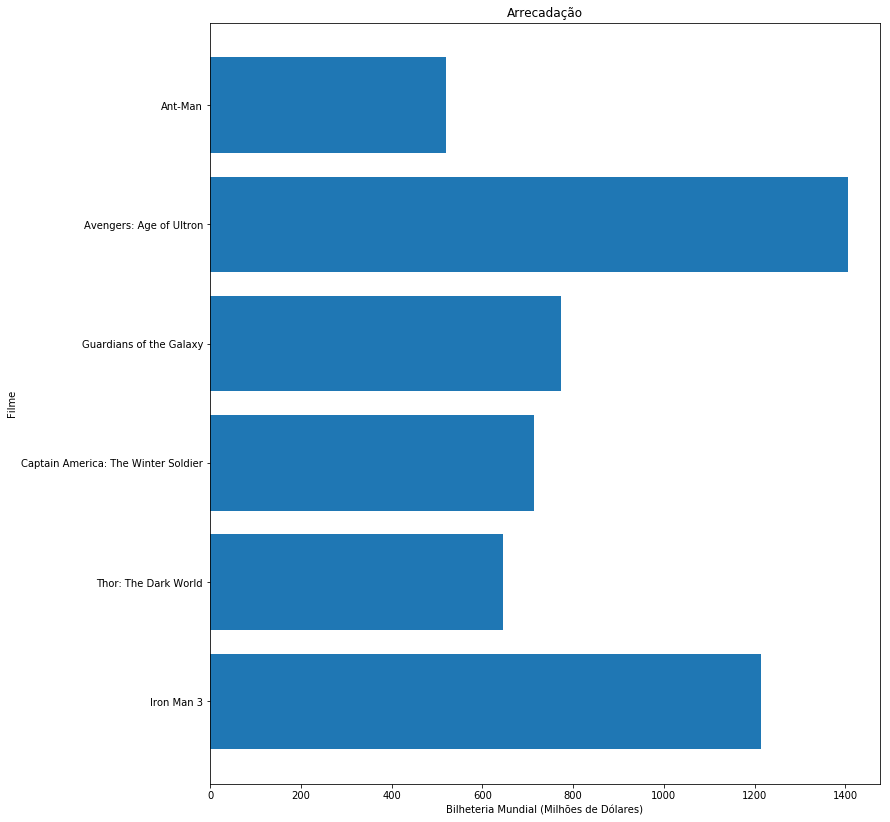

In [31]:
filmes2 = df[df['Phase']==2]['Movies']
bilheteria2 = df[df['Phase']==2]['Gross Worldwide']

plt.title('Arrecadação')
plt.xlabel("Bilheteria Mundial (Milhões de Dólares)")
plt.ylabel("Filme")
plt.barh(filmes2, bilheteria2)
plt.show()

### Crítica

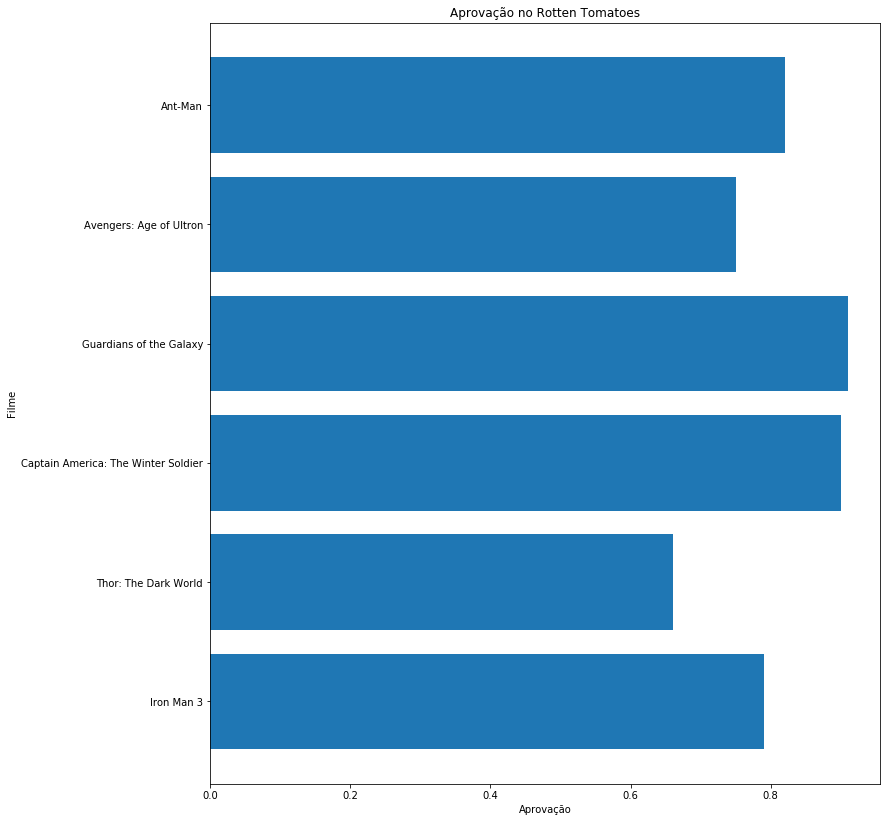

In [32]:
imdb2 = df[df['Phase']==2]['IMDb']
rotten2 = df[df['Phase']==2]['Rotten Tomatoes']

plt.barh(filmes2, rotten2)
plt.title('Aprovação no Rotten Tomatoes')
plt.xlabel("Aprovação")
plt.ylabel("Filme")
plt.show()

### Tempo de Tela dos Personagens


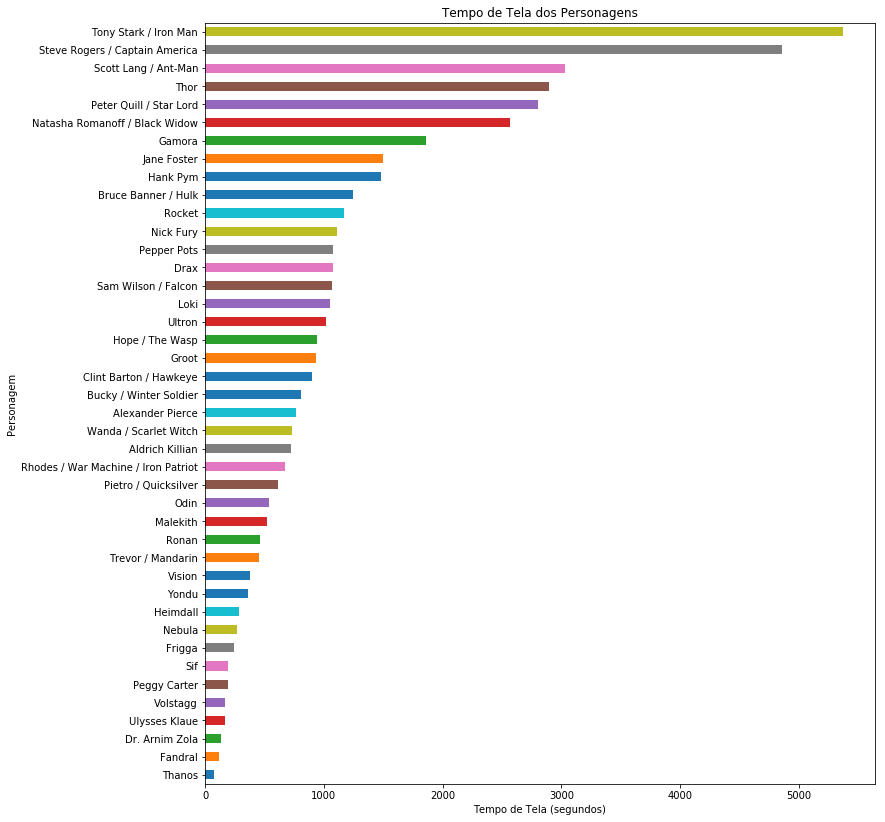

In [33]:
personagens2 = df[df['Phase']==2]
personagens2 = personagens2.loc[:, 'Tony Stark / Iron Man':'Hank Pym']

personagens2 = personagens2.loc[:, ~(personagens2 == 0).all()]

tempo = personagens2.sum().sort_values()

plt.title('Tempo de Tela dos Personagens')
plt.ylabel('Personagem')
plt.xlabel('Tempo de Tela (segundos)')
tempo.plot(kind='barh')

## Fase 3

A Fase 3 é ambientada em um clima de discórdia gerado a partir do ataque de Ultron contra a Terra. Com a opinião pública se dividindo cada vez mais sobre os super-heróis, os Vingadores se separam. No meio dos conflitos, vários personagens são introduzidos: Doutor Estranho, Pantera Negra, Mantis, Homem Aranha e Capitã Marvel. A grande trama de Thanos para coletar as jóias do Infinito, iniciada na Fase 1, é encerrada aqui.

### Bilheteria

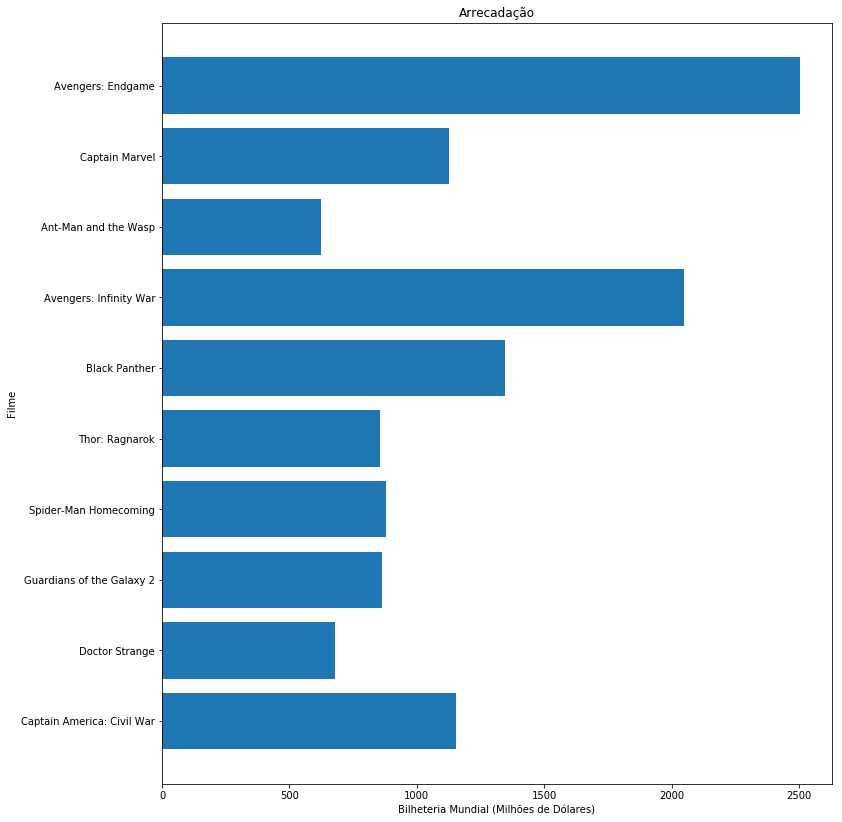

In [34]:
filmes3 = df[df['Phase']==3]['Movies']
bilheteria3 = df[df['Phase']==3]['Gross Worldwide']

plt.title('Arrecadação')
plt.xlabel("Bilheteria Mundial (Milhões de Dólares)")
plt.ylabel("Filme")
plt.barh(filmes3, bilheteria3)
plt.show()

### Crítica

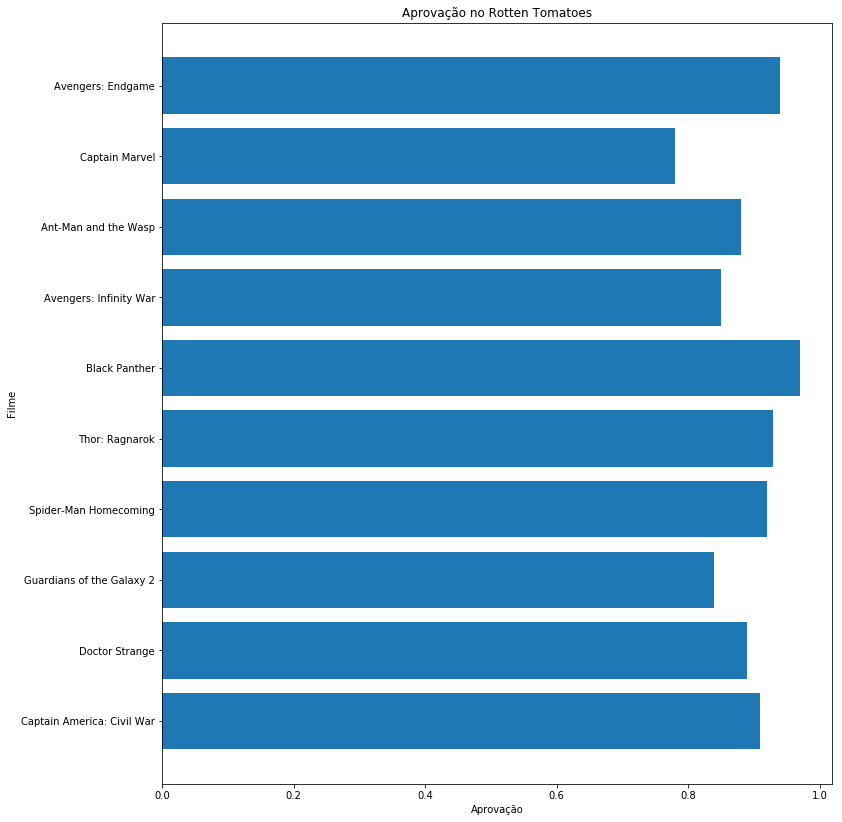

In [35]:
imdb3 = df[df['Phase']==3]['IMDb']
rotten3 = df[df['Phase']==3]['Rotten Tomatoes']

plt.barh(filmes3, rotten3)
plt.title('Aprovação no Rotten Tomatoes')
plt.xlabel("Aprovação")
plt.ylabel("Filme")
plt.show()

### Tempo de Tela dos Personagens

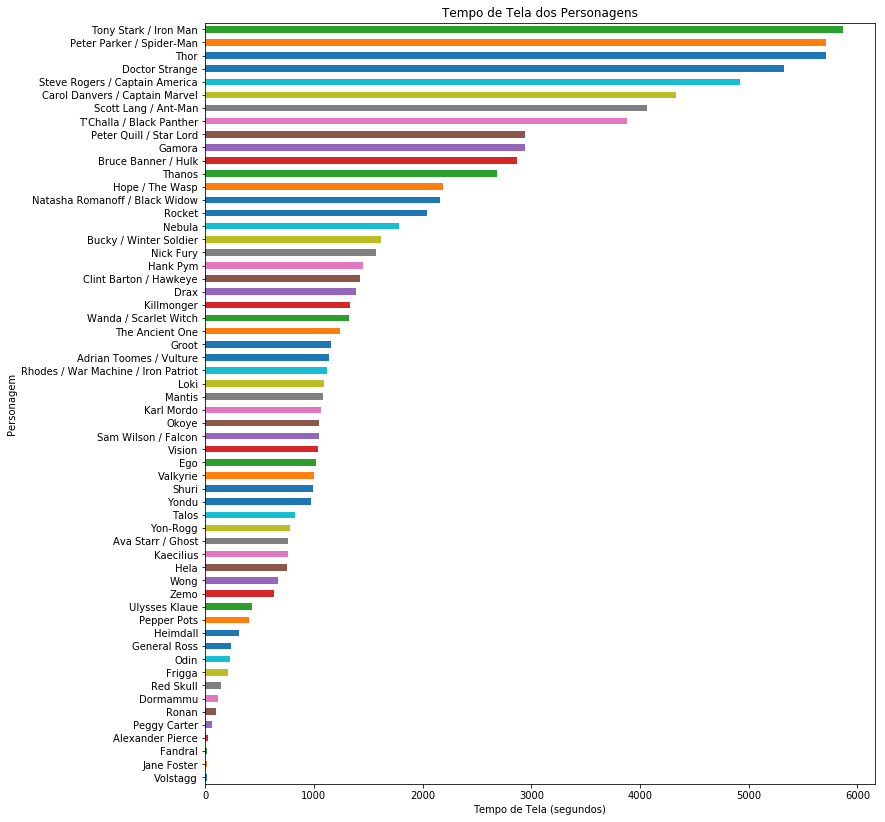

In [36]:
personagens3 = df[df['Phase']==3]
personagens3 = personagens3.loc[:, 'Tony Stark / Iron Man':'Hank Pym']
personagens3 = personagens3.loc[:, ~(personagens3 == 0).all()]

tempo = personagens3.sum().sort_values()

plt.title('Tempo de Tela dos Personagens')
plt.ylabel('Personagem')
plt.xlabel('Tempo de Tela (segundos)')
tempo.plot(kind='barh')


## Sumário

### Bilheteria Total

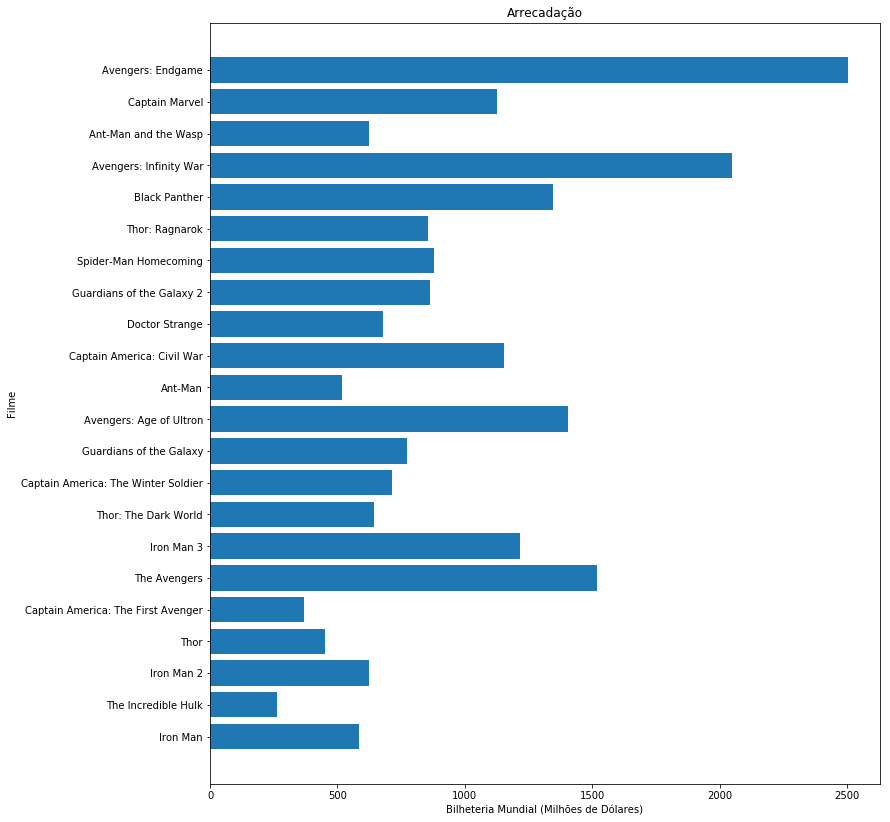

In [37]:
filmes = df['Movies']
bilheteria = df['Gross Worldwide']

plt.title('Arrecadação')
plt.xlabel("Bilheteria Mundial (Milhões de Dólares)")
plt.ylabel("Filme")
plt.barh(filmes, bilheteria)
plt.show()

### Crítica

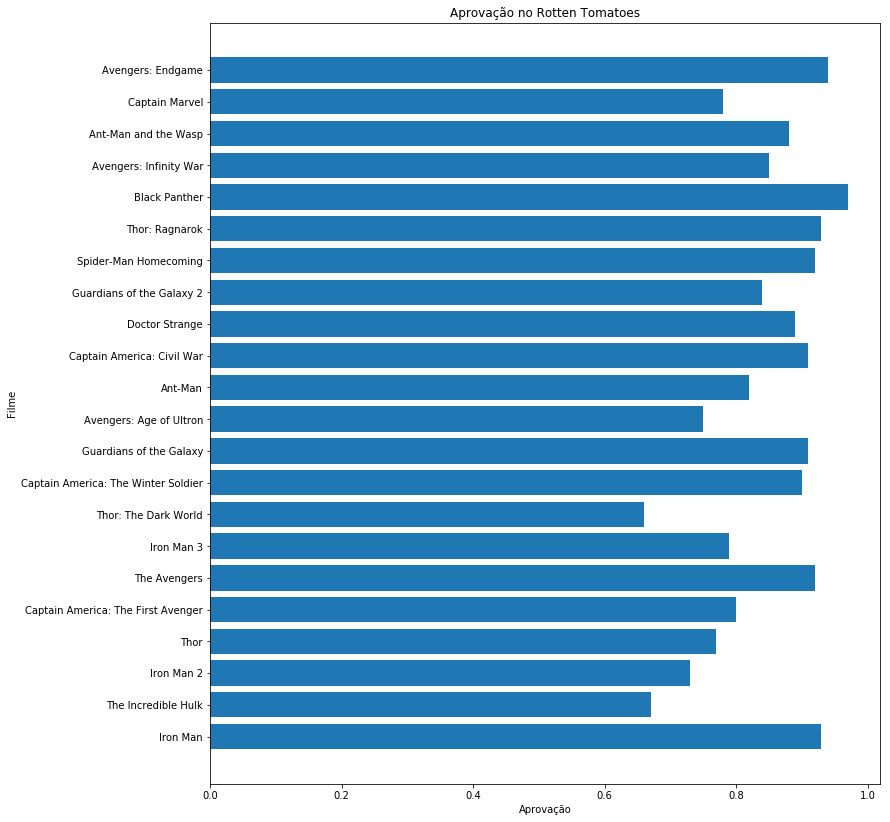

In [38]:
imdb = df['IMDb']
rotten = df['Rotten Tomatoes']

plt.barh(filmes, rotten)
plt.title('Aprovação no Rotten Tomatoes')
plt.xlabel("Aprovação")
plt.ylabel("Filme")
plt.show()

### Total de Aparições

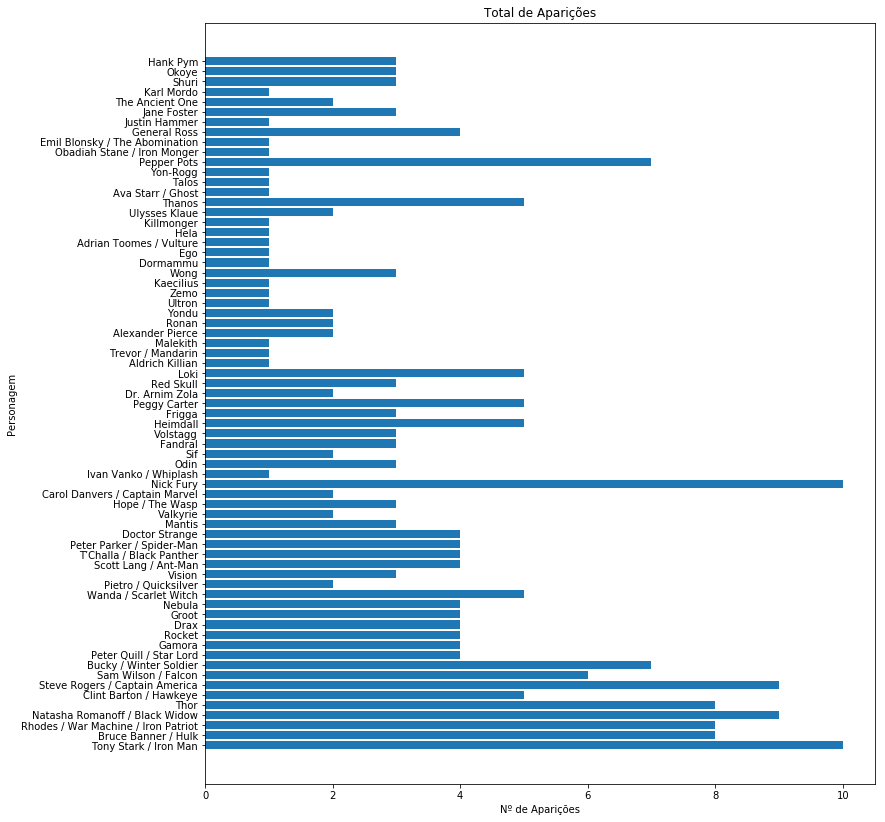

In [39]:
personagens = df.loc[:, 'Tony Stark / Iron Man':'Hank Pym']
aparicoes = []

ronman = (personagens['Tony Stark / Iron Man'] > 0).sum()
for i in personagens: 
    aparicoes.append((personagens[i] > 0).sum())

plt.title('Total de Aparições')
plt.xlabel('Nº de Aparições')
plt.ylabel('Personagem')
plt.barh(personagens.columns.values, aparicoes)
plt.show()

### Tempo de Tela Total
Incluindo cameos e aparições em cenas pós-créditos

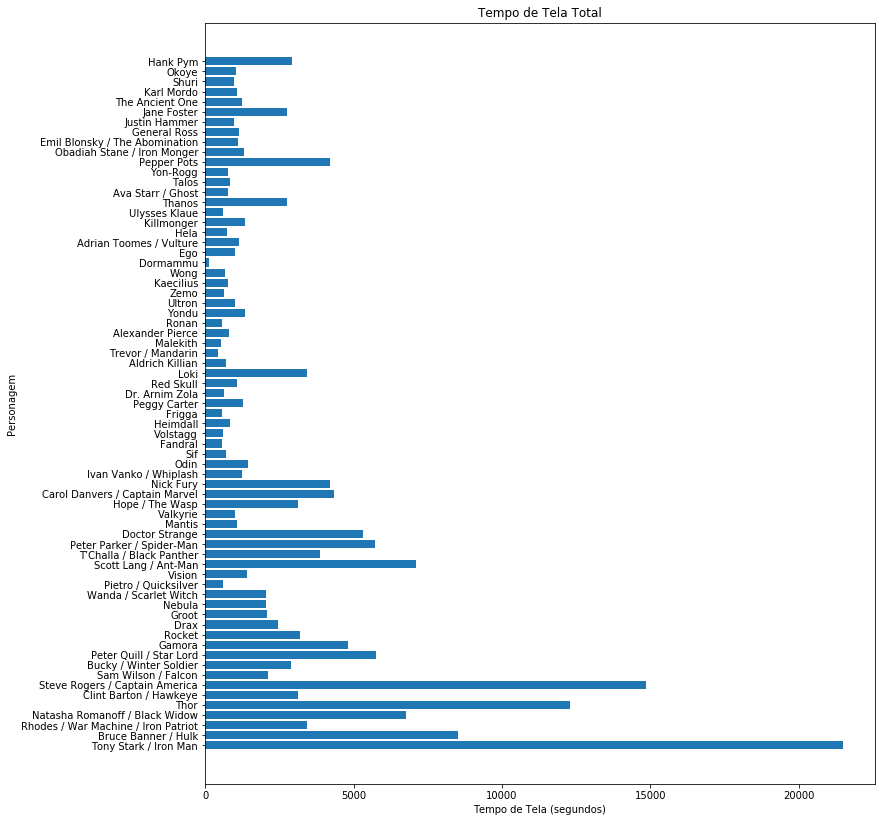

In [40]:
personagens = df.loc[:, 'Tony Stark / Iron Man':'Hank Pym']
tempo = []

ronman = (personagens['Tony Stark / Iron Man']).sum()
for i in personagens: 
    tempo.append(personagens[i].sum())

plt.title('Tempo de Tela Total')
plt.xlabel('Tempo de Tela (segundos)')
plt.ylabel('Personagem')
plt.barh(personagens.columns.values, tempo)
plt.show()

In [41]:
conn.close()